In [1]:
import proplot as pplt
import matplotlib as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature

from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import array_bounds

In [2]:
years = [2019, 2020, 2021, 2022, 2023]
intervals = [1, 3, 6, 12]
anoms = {}

for year in years:
    anoms[(year, 1)] = rio.open(f'./Data/Enviro/{year}_one_month_prcp_anom.tif', 'r')
    anoms[(year, 3)] = rio.open(f'./Data/Enviro/{year}_three_month_prcp_anom.tif', 'r')
    anoms[(year, 6)] = rio.open(f'./Data/Enviro/{year}_six_month_prcp_anom.tif', 'r')
    anoms[(year, 12)] = rio.open(f'./Data/Enviro/{year}_twelve_month_prcp_anom.tif', 'r')

In [3]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)

def prepare_for_viz(raster_file, dest_crs):
    transform, width, height = calculate_default_transform(
        raster_file.crs, dest_crs, raster_file.width, raster_file.height, *raster_file.bounds)
    
    new_image, new_transform = reproject(
        source=raster_file.read(),
        src_transform=raster_file.transform,
        src_crs=raster_file.crs,
        dst_crs=dest_crs,
        resampling=Resampling.nearest,
        dst_nodata=np.nan)
    
    new_bounds = array_bounds(new_image.shape[1], new_image.shape[2], new_transform)
    
    return new_image, new_bounds

images = {}
bounds = {}

for year in years:
    for interval in intervals:
        images[(year, interval)], bounds[(year, interval)] = prepare_for_viz(anoms[(year, interval)], dest_crs)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

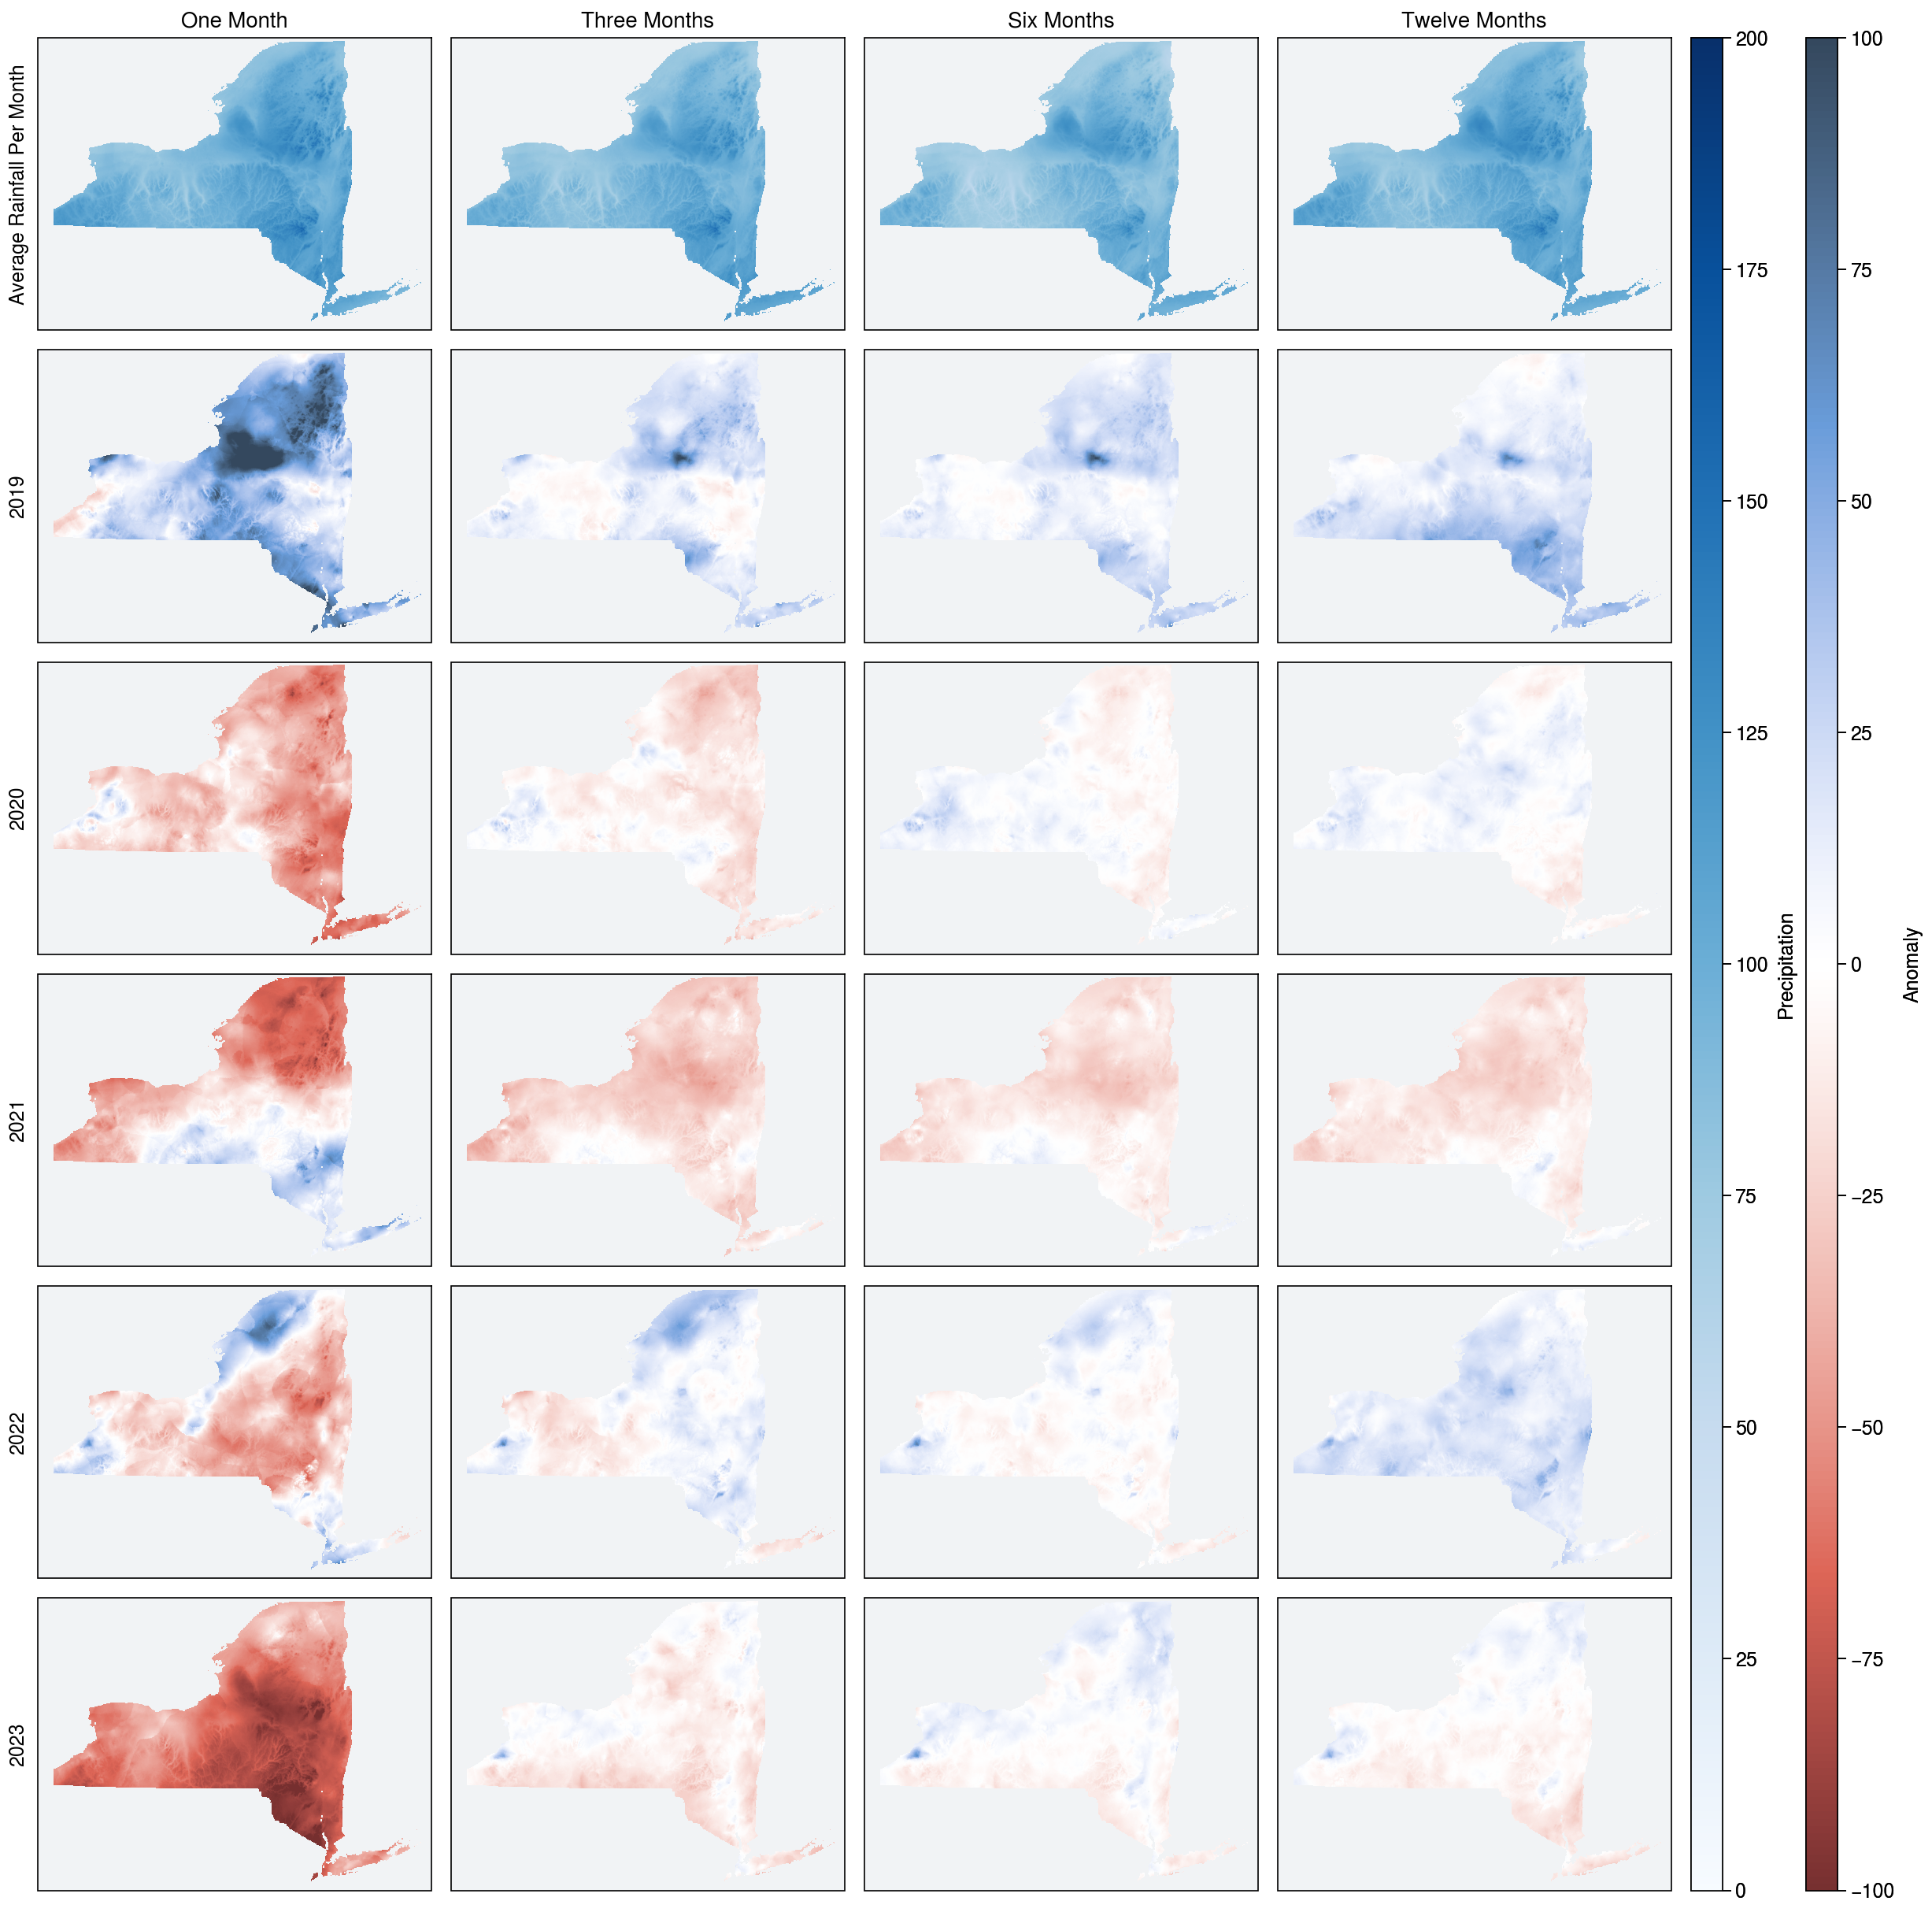

In [16]:
fig, axes = pplt.subplots(nrows=6, ncols=4, order='F', proj=dest_crs, facecolor='white')



# Plot overall means

for j, interval in enumerate(intervals):
    m1 = axes[6*j].imshow(images[(2019, interval)][0]/interval, cmap='Blues', transform=dest_crs, vmin=0, vmax=200,
                          extent=[bounds[(2019, interval)][0], bounds[(2019, interval)][2], bounds[(2019, interval)][1], bounds[(2019, interval)][3]])
    axes[6*j].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[6*j].format(grid=False, facecolor='gray1')

# Plot Individual Anomalies
for i, year in enumerate(years):
    for j, interval in enumerate(intervals):
        m2 = axes[(i+1) + 6*j].imshow(images[(year, interval)][2]/interval, cmap='NegPos_r', transform=dest_crs, vmin=-100, vmax=100,
                                      extent=[bounds[(year, interval)][0], bounds[(year, interval)][2], bounds[(year, interval)][1], bounds[(year, interval)][3]])
        axes[(i+1) + 6*j].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
        axes[(i+1) + 6*j].format(grid=False, facecolor='gray1')

# Set ylabels
for i, label in enumerate(['Average Rainfall Per Month', '2019', '2020', '2021', '2022', '2023']):
    axes[i].set_ylabel(label)
    
    # Need to rest x/y ticks for each GeoAxes because Cartopy misuses y/x labels
    axes[i].set_yticks([])
    axes[i].set_xticks([])

# Set Column titles
for j, title in enumerate(['One Month', 'Three Months', 'Six Months', 'Twelve Months']):
    axes[6*j].format(title=title)
    
fig.colorbar(m1, label='Precipitation')
fig.colorbar(m2, label='Anomaly')


fig.savefig('./Figures/Enviro/prcp_prior_period.png')

# Tmax

In [17]:
years = [2019, 2020, 2021, 2022, 2023]
intervals = [1, 3, 6, 12]
anoms = {}

for year in years:
    anoms[(year, 1)] = rio.open(f'./Data/Enviro/{year}_one_month_tmax_anom.tif', 'r')
    anoms[(year, 3)] = rio.open(f'./Data/Enviro/{year}_three_month_tmax_anom.tif', 'r')
    anoms[(year, 6)] = rio.open(f'./Data/Enviro/{year}_six_month_tmax_anom.tif', 'r')
    anoms[(year, 12)] = rio.open(f'./Data/Enviro/{year}_twelve_month_tmax_anom.tif', 'r')

In [18]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)

def prepare_for_viz(raster_file, dest_crs):
    transform, width, height = calculate_default_transform(
        raster_file.crs, dest_crs, raster_file.width, raster_file.height, *raster_file.bounds)
    
    new_image, new_transform = reproject(
        source=raster_file.read(),
        src_transform=raster_file.transform,
        src_crs=raster_file.crs,
        dst_crs=dest_crs,
        resampling=Resampling.nearest,
        dst_nodata=np.nan)
    
    new_bounds = array_bounds(new_image.shape[1], new_image.shape[2], new_transform)
    
    return new_image, new_bounds

images = {}
bounds = {}

for year in years:
    for interval in intervals:
        images[(year, interval)], bounds[(year, interval)] = prepare_for_viz(anoms[(year, interval)], dest_crs)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

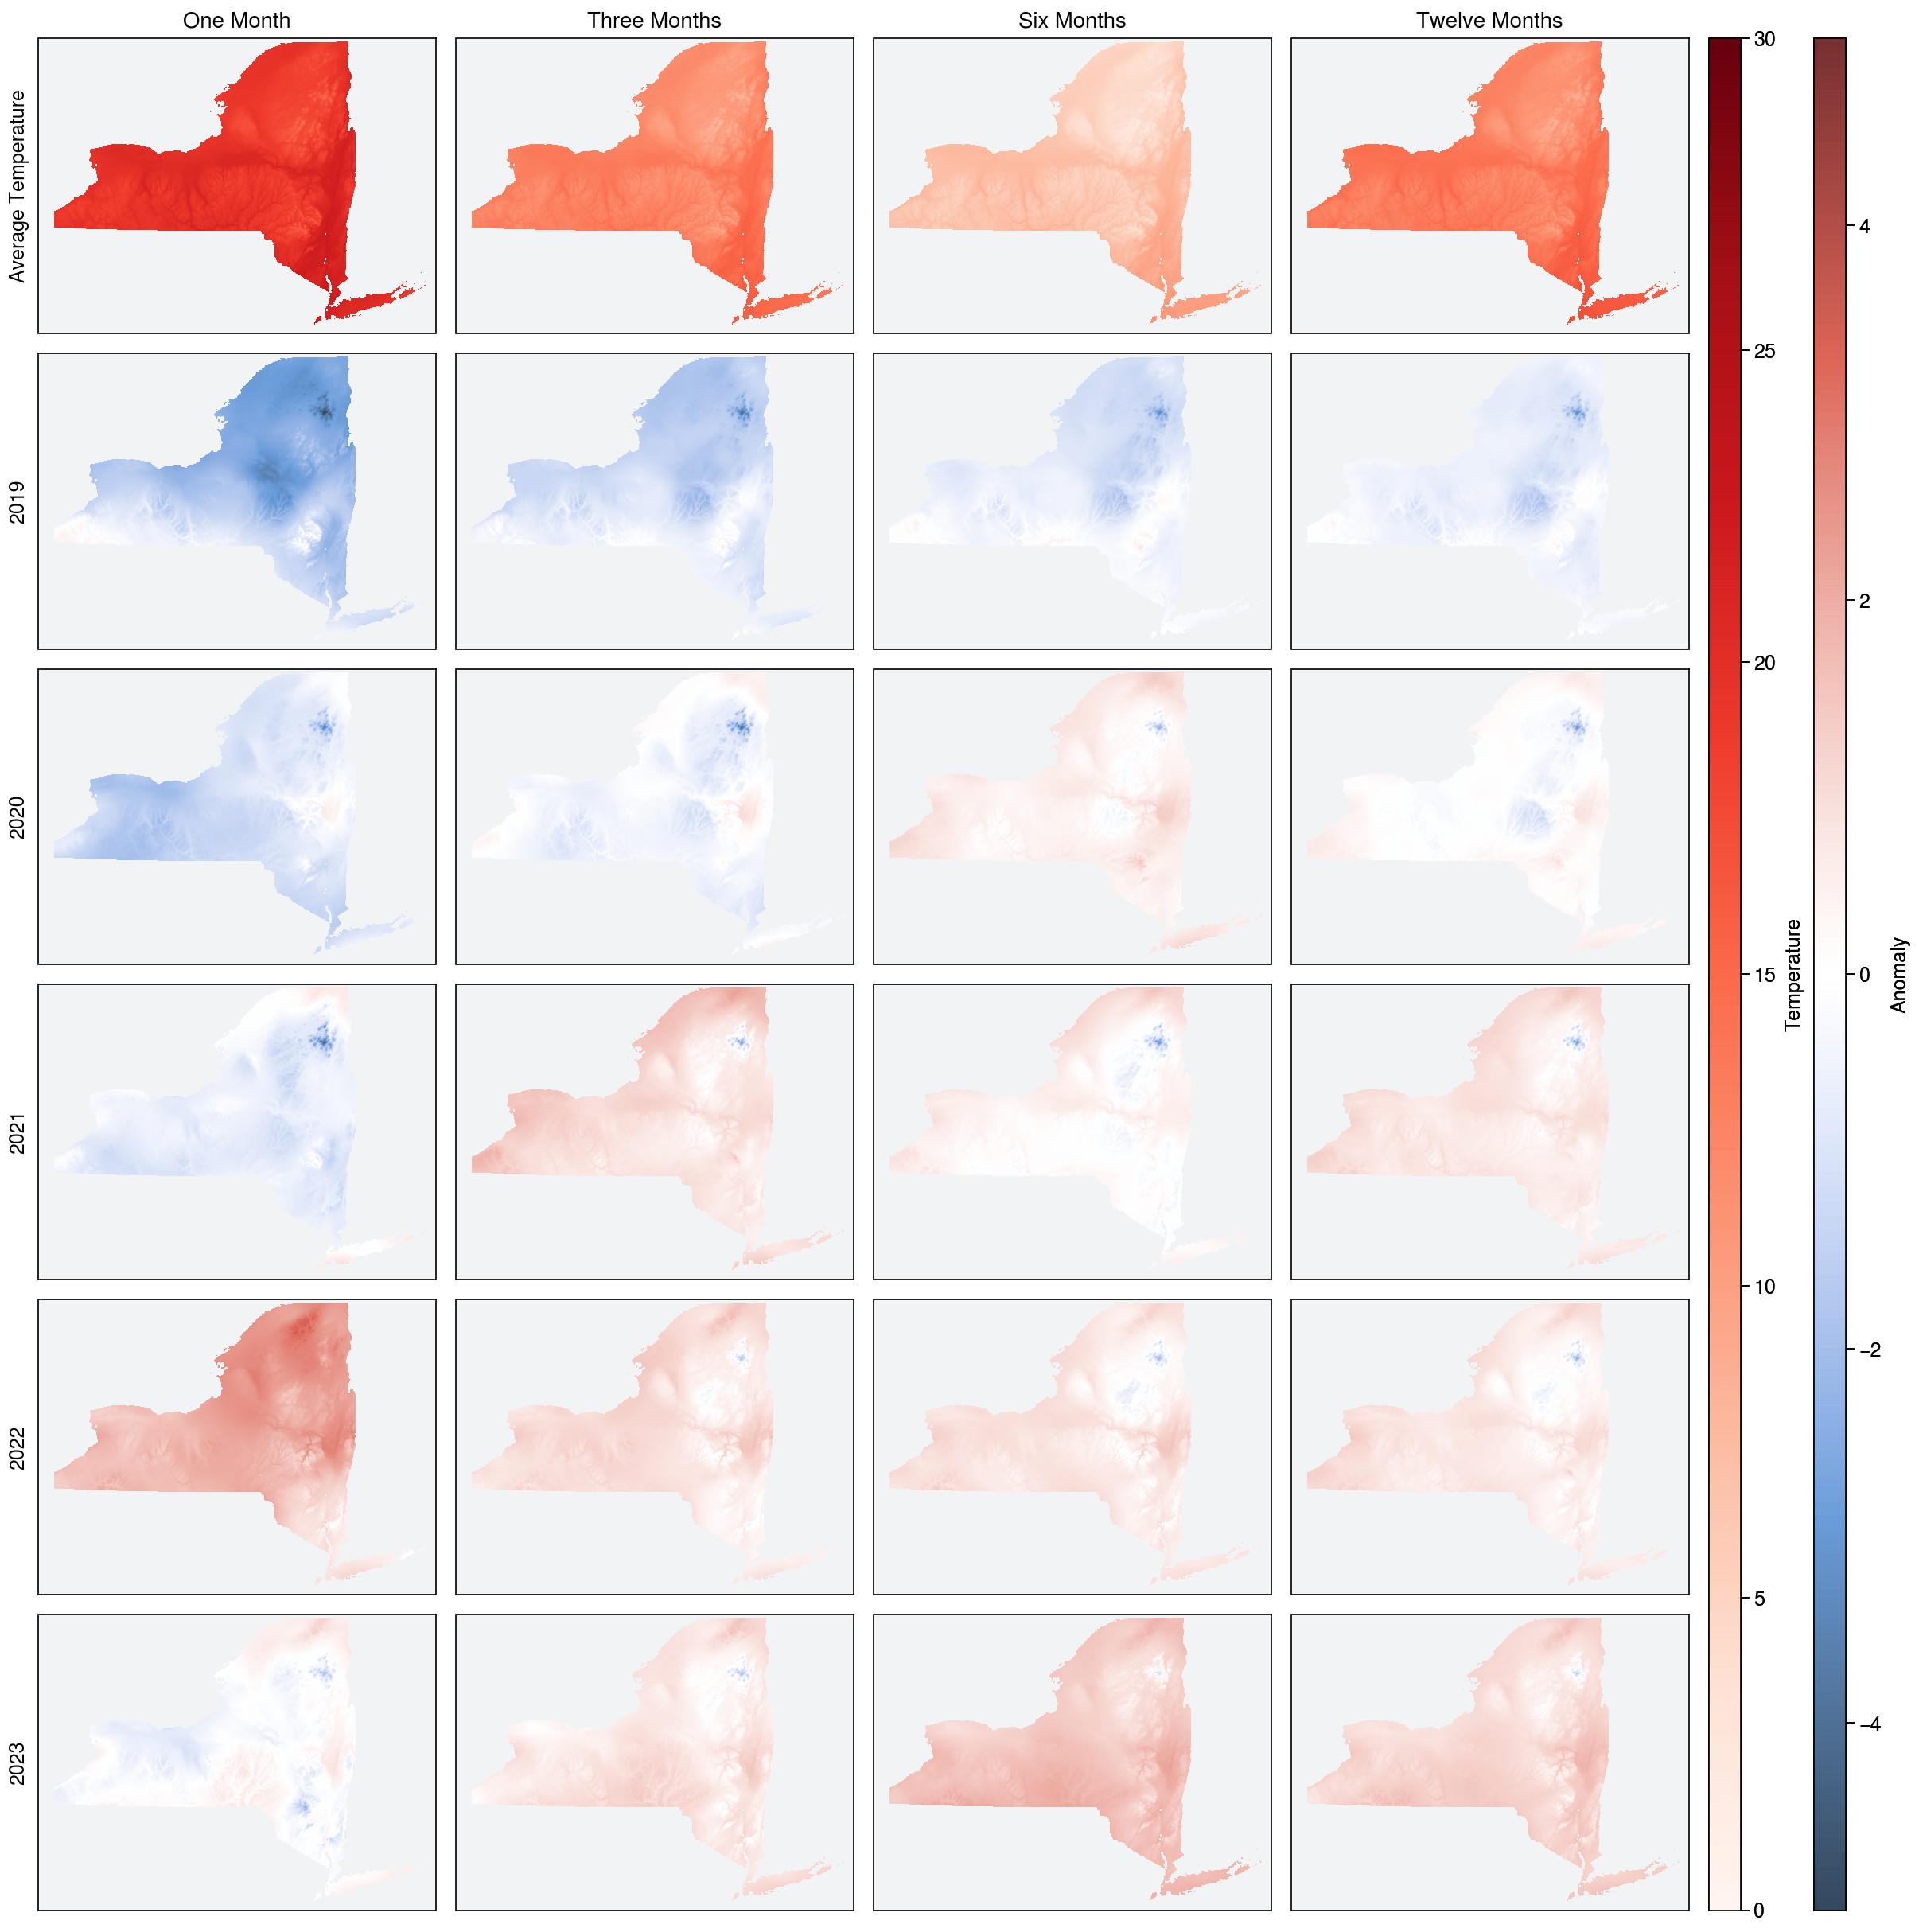

In [24]:
fig, axes = pplt.subplots(nrows=6, ncols=4, order='F', proj=dest_crs, facecolor='white')



# Plot overall means

for j, interval in enumerate(intervals):
    m1 = axes[6*j].imshow(images[(2019, interval)][0], cmap='Reds', transform=dest_crs, vmin=0, vmax=30,
                          extent=[bounds[(2019, interval)][0], bounds[(2019, interval)][2], bounds[(2019, interval)][1], bounds[(2019, interval)][3]])
    axes[6*j].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[6*j].format(grid=False, facecolor='gray1')

# Plot Individual Anomalies
for i, year in enumerate(years):
    for j, interval in enumerate(intervals):
        m2 = axes[(i+1) + 6*j].imshow(images[(year, interval)][1], cmap='NegPos', transform=dest_crs, vmin=-5, vmax=5,
                                      extent=[bounds[(year, interval)][0], bounds[(year, interval)][2], bounds[(year, interval)][1], bounds[(year, interval)][3]])
        axes[(i+1) + 6*j].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
        axes[(i+1) + 6*j].format(grid=False, facecolor='gray1')

# Set ylabels
for i, label in enumerate(['Average Temperature', '2019', '2020', '2021', '2022', '2023']):
    axes[i].set_ylabel(label)
    
    # Need to rest x/y ticks for each GeoAxes because Cartopy misuses y/x labels
    axes[i].set_yticks([])
    axes[i].set_xticks([])

# Set Column titles
for j, title in enumerate(['One Month', 'Three Months', 'Six Months', 'Twelve Months']):
    axes[6*j].format(title=title)
    
fig.colorbar(m1, label='Temperature')
fig.colorbar(m2, label='Anomaly')


fig.savefig('./Figures/Enviro/tmax_prior_period.png')

# Tmin

In [2]:
years = [2019, 2020, 2021, 2022, 2023]
intervals = [1, 3, 6, 12]
anoms = {}

for year in years:
    anoms[(year, 1)] = rio.open(f'./Data/Enviro/{year}_one_month_tmin_anom.tif', 'r')
    anoms[(year, 3)] = rio.open(f'./Data/Enviro/{year}_three_month_tmin_anom.tif', 'r')
    anoms[(year, 6)] = rio.open(f'./Data/Enviro/{year}_six_month_tmin_anom.tif', 'r')
    anoms[(year, 12)] = rio.open(f'./Data/Enviro/{year}_twelve_month_tmin_anom.tif', 'r')

In [3]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)

def prepare_for_viz(raster_file, dest_crs):
    transform, width, height = calculate_default_transform(
        raster_file.crs, dest_crs, raster_file.width, raster_file.height, *raster_file.bounds)
    
    new_image, new_transform = reproject(
        source=raster_file.read(),
        src_transform=raster_file.transform,
        src_crs=raster_file.crs,
        dst_crs=dest_crs,
        resampling=Resampling.nearest,
        dst_nodata=np.nan)
    
    new_bounds = array_bounds(new_image.shape[1], new_image.shape[2], new_transform)
    
    return new_image, new_bounds

images = {}
bounds = {}

for year in years:
    for interval in intervals:
        images[(year, interval)], bounds[(year, interval)] = prepare_for_viz(anoms[(year, interval)], dest_crs)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

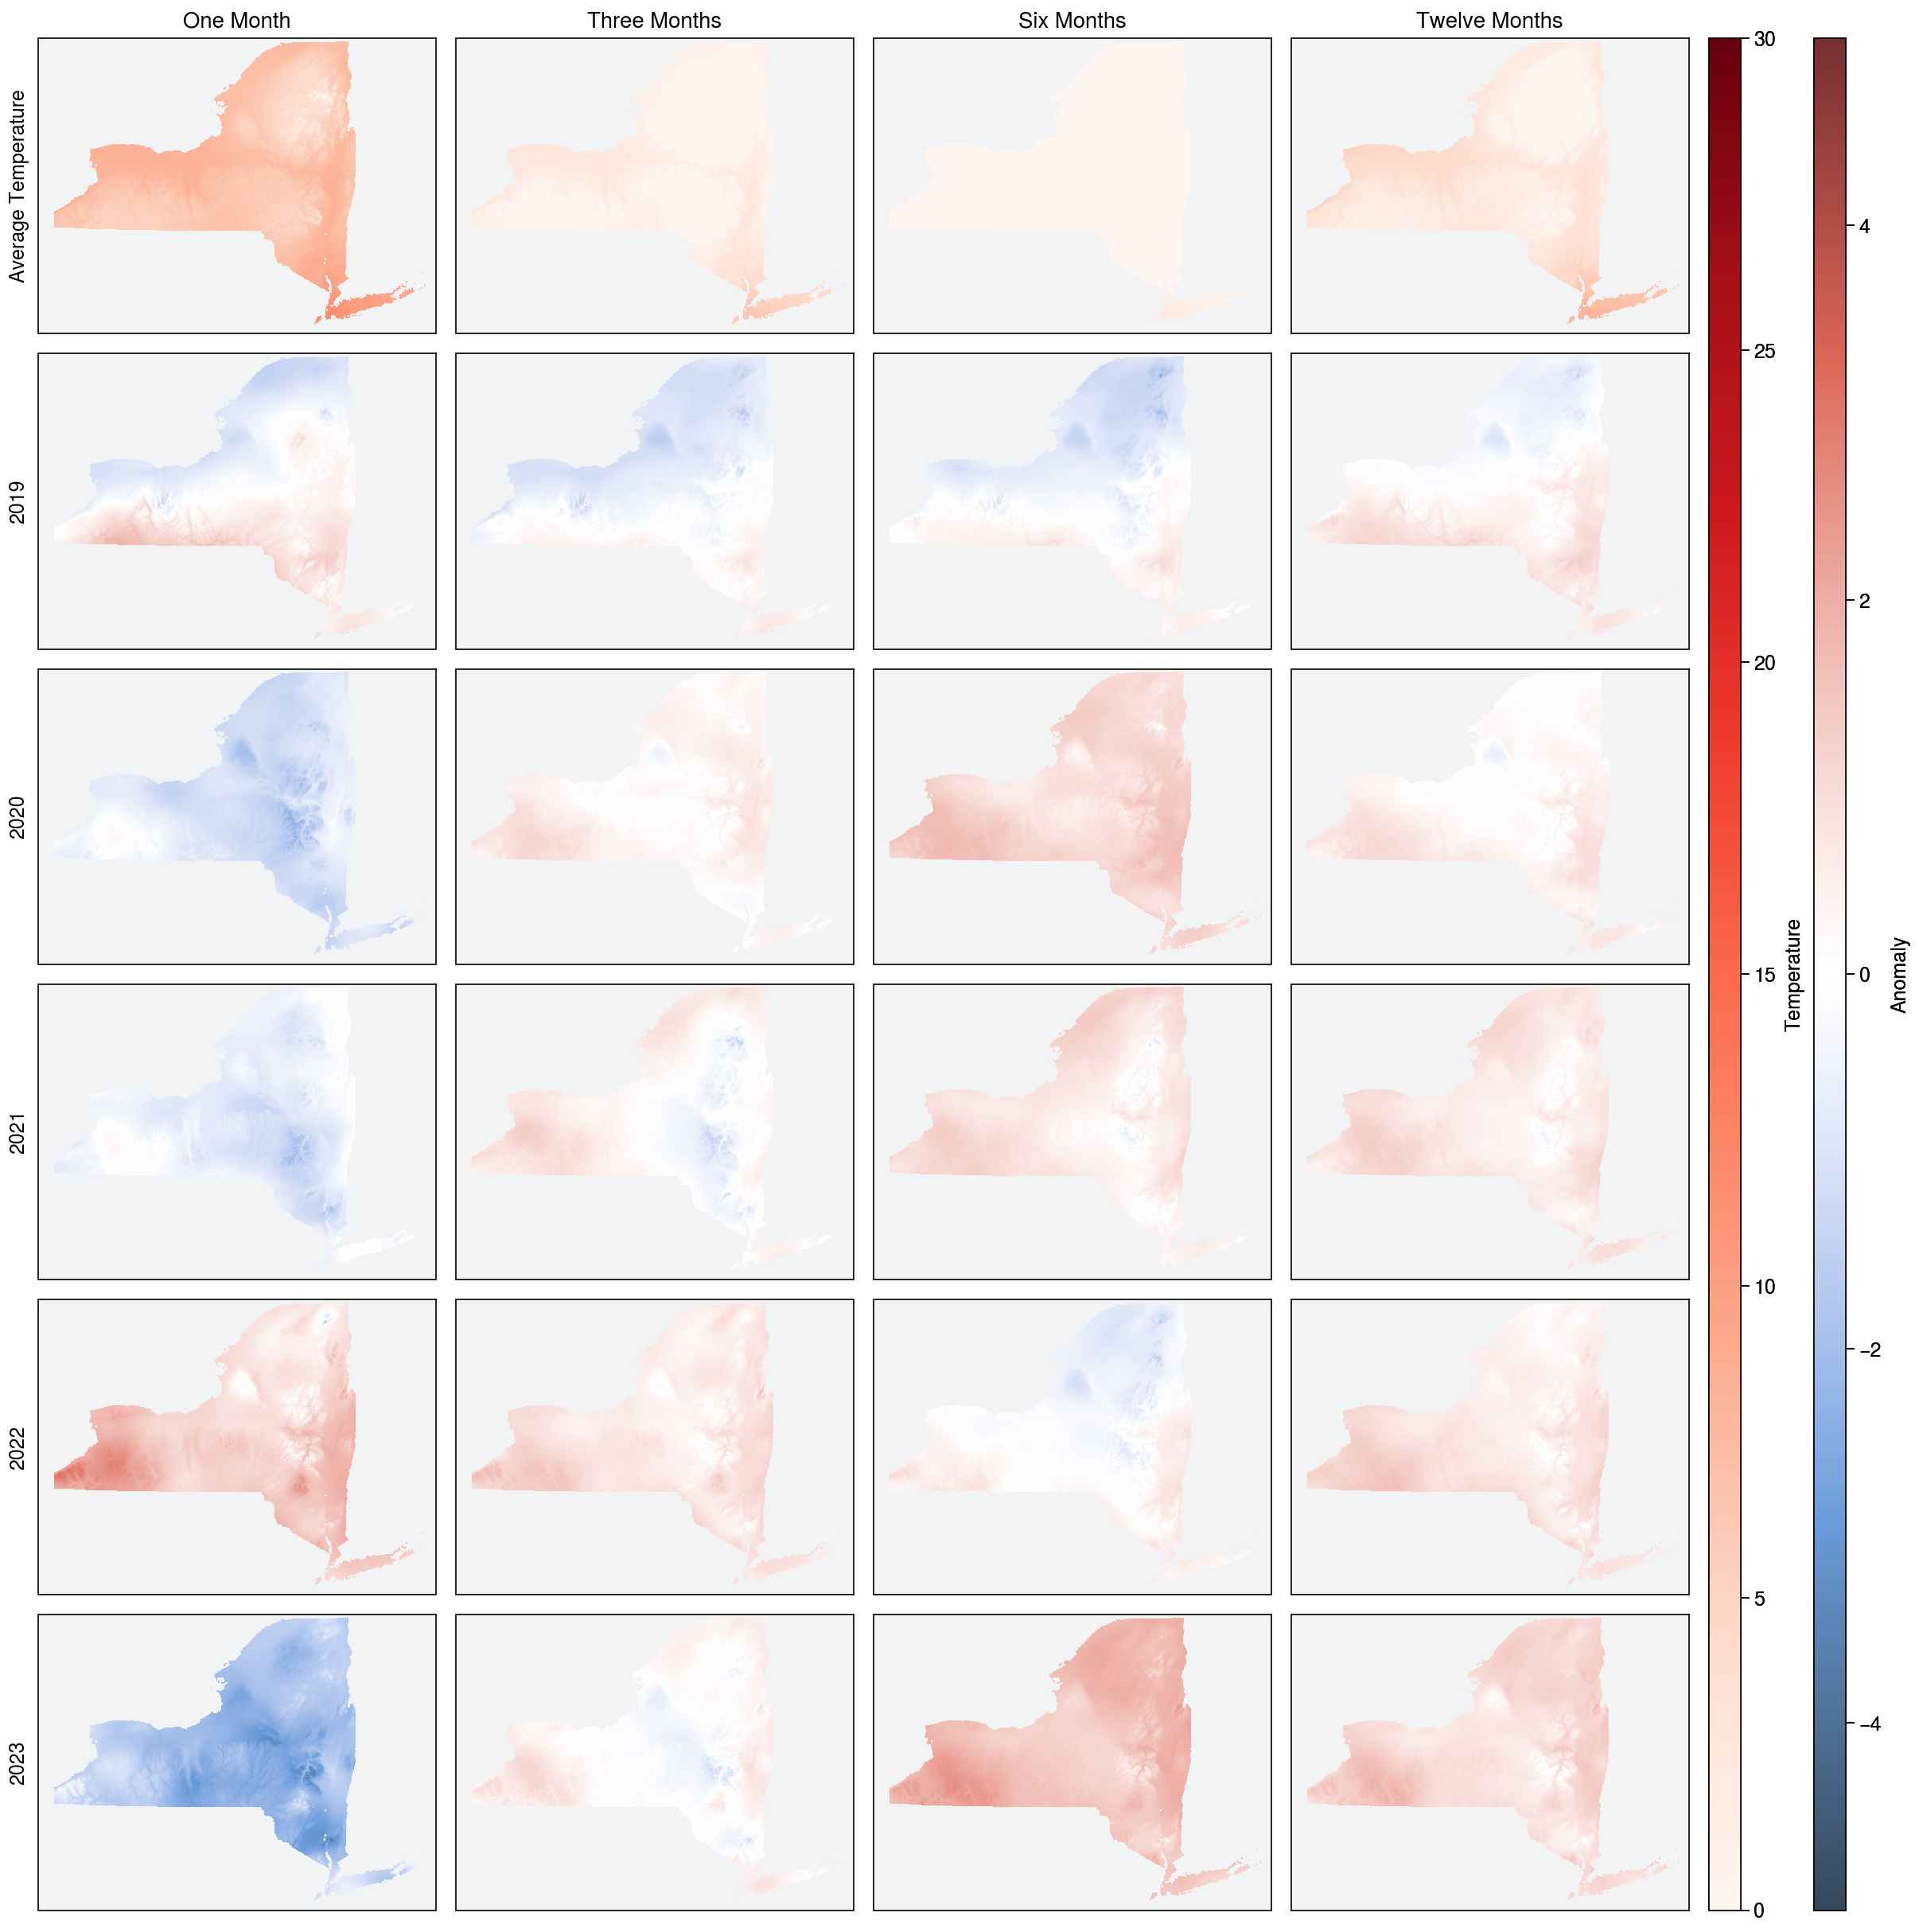

In [4]:
fig, axes = pplt.subplots(nrows=6, ncols=4, order='F', proj=dest_crs, facecolor='white')



# Plot overall means

for j, interval in enumerate(intervals):
    m1 = axes[6*j].imshow(images[(2019, interval)][0], cmap='Reds', transform=dest_crs, vmin=0, vmax=30,
                          extent=[bounds[(2019, interval)][0], bounds[(2019, interval)][2], bounds[(2019, interval)][1], bounds[(2019, interval)][3]])
    axes[6*j].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[6*j].format(grid=False, facecolor='gray1')

# Plot Individual Anomalies
for i, year in enumerate(years):
    for j, interval in enumerate(intervals):
        m2 = axes[(i+1) + 6*j].imshow(images[(year, interval)][1], cmap='NegPos', transform=dest_crs, vmin=-5, vmax=5,
                                      extent=[bounds[(year, interval)][0], bounds[(year, interval)][2], bounds[(year, interval)][1], bounds[(year, interval)][3]])
        axes[(i+1) + 6*j].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
        axes[(i+1) + 6*j].format(grid=False, facecolor='gray1')

# Set ylabels
for i, label in enumerate(['Average Temperature', '2019', '2020', '2021', '2022', '2023']):
    axes[i].set_ylabel(label)
    
    # Need to rest x/y ticks for each GeoAxes because Cartopy misuses y/x labels
    axes[i].set_yticks([])
    axes[i].set_xticks([])

# Set Column titles
for j, title in enumerate(['One Month', 'Three Months', 'Six Months', 'Twelve Months']):
    axes[6*j].format(title=title)
    
fig.colorbar(m1, label='Temperature')
fig.colorbar(m2, label='Anomaly')


fig.savefig('./Figures/Enviro/tmin_prior_period.png')